# Hidden Markov Model in TensorFlow
## Implementation of Viterbi & Forward-Backward Algorithms

In [3]:
import tensorflow as tf
import numpy as np
from __future__ import print_function
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/marvinbertin/anaconda/envs/TensorFlow-env/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
def dptable(state_prob):
    print(" ".join(("%8d" % i) for i in range(state_prob.shape[0])))
    for i, prob in enumerate(state_prob.T):
        print("%.7s: " % states[i] +" ".join("%.7s" % ("%f" % p) for p in prob))

In [5]:
from HiddenMarkovModel import HiddenMarkovModel

## Viterbi Example

In [4]:
p0 = np.array([0.6, 0.4])

emi = np.array([[0.5, 0.1],
                [0.4, 0.3],
                [0.1, 0.6]])

trans = np.array([[0.7, 0.3],
                  [0.4, 0.6]])

states = {0:'Healthy', 1:'Fever'}
obs = {0:'normal', 1:'cold', 2:'dizzy'}

obs_seq = np.array([0, 1, 2, 1, 0])

In [5]:
model =  HiddenMarkovModel(trans, emi, p0)
states_seq, state_prob = model.run_viterbi(obs_seq)
dptable(state_prob)
print()
print("Most likely States: ", [states[s] for s in states_seq])

       0        1        2        3        4
Healthy: 0.30000 0.08400 0.00588 0.00241 0.00084
Fever: 0.04000 0.02700 0.01512 0.00272 0.00016

Most likely States:  ['Healthy', 'Healthy', 'Fever', 'Healthy', 'Healthy']


# Forward - Backward Example

In [6]:
p0 = np.array([0.5, 0.5])

emi = np.array([[0.9, 0.2],
                [0.1, 0.8]])

trans = np.array([[0.7, 0.3],
                  [0.3, 0.7]])

states = {0:'rain', 1:'no_rain'}
obs = {0:'umbrella', 1:'no_umbrella'}

obs_seq = np.array([0, 0, 1, 0, 0])

In [7]:
# model =  HiddenMarkovModel(trans, emi, p0)

# results = model.run_forward_backward(obs_seq)
# result_list = ["Forward", "Backward", "Posterior"]

# for state_prob, path in zip(results, result_list) :
#     inferred_states = np.argmax(state_prob, axis=1)
#     print()
#     print(path)
#     print("Most likely States: ",[states[s] for s in inferred_states])
#     print()
#     dptable(state_prob)
#     print()


Forward
Most likely States:  ['rain', 'rain', 'rain', 'no_rain', 'rain', 'rain']

         0          1          2          3          4          5
rain: 0.50000 0.81818 0.88335 0.19066 0.73079 0.86733
no_rain: 0.50000 0.18181 0.11664 0.80933 0.26920 0.13266


Backward
Most likely States:  ['rain', 'rain', 'no_rain', 'rain', 'rain', 'rain']

         0          1          2          3          4          5
rain: 0.64693 0.59231 0.37626 0.65334 0.62727 1.00000
no_rain: 0.35306 0.40768 0.62373 0.34665 0.37272 1.00000


Posterior
Most likely States:  ['rain', 'rain', 'rain', 'no_rain', 'rain', 'rain']

         0          1          2          3          4          5
rain: 0.64693 0.86733 0.82041 0.30748 0.82041 0.86733
no_rain: 0.35306 0.13266 0.17958 0.69251 0.17958 0.13266



In [7]:
def generate_HMM_observation(num_obs, pi, T, E):
    def drawFrom(probs):
        return np.where(np.random.multinomial(1,probs) == 1)[0][0]

    obs = np.zeros(num_obs)
    states = np.zeros(num_obs)
    states[0] = drawFrom(pi)
    obs[0] = drawFrom(E[:, int(states[0])])
    for t in range(1,num_obs):
        states[t] = drawFrom(T[int(states[t-1]),:])
        obs[t] = drawFrom(E[:, int(states[t])])
    return obs, states

In [45]:
True_pi = np.array([0.5, 0.5])

True_T = np.array([[0.85, 0.15],
                  [0.12, 0.88]])

True_E = np.array([[0.8, 0.0],
                   [0.1, 0.0],
                   [0.1, 1.0]])

In [54]:
obs_seq, states = generate_HMM_observation(50, True_pi, True_T, True_E)

In [55]:
print("First 10 Obersvations:  ", obs_seq[:18])
print("First 10 Hidden States: ", states[:18])

First 10 Obersvations:   [ 2.  2.  0.  1.  0.  0.  0.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
First 10 Hidden States:  [ 1.  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [56]:
init_pi = np.array([0.5, 0.5])

init_T = np.array([[0.5, 0.5],
                  [0.5, 0.5]])

init_E = np.array([[0.3, 0.2],
                   [0.3, 0.5],
                   [0.4, 0.3]])

In [57]:
model =  HiddenMarkovModel(init_T, init_E, init_pi, epsilon=0.0001, maxStep=10)

trans0, transition, emission, c = model.run_Baum_Welch_EM(obs_seq, summary=False, monitor_state_1=True)

print(transition)
print()
print(emission)
print()
print(c)

[[ 0.56860878  0.43139122]
 [ 0.57724864  0.42275136]]

[[ 0.31516444  0.27972215]
 [ 0.02615512  0.05851334]
 [ 0.65868045  0.6617645 ]]

True


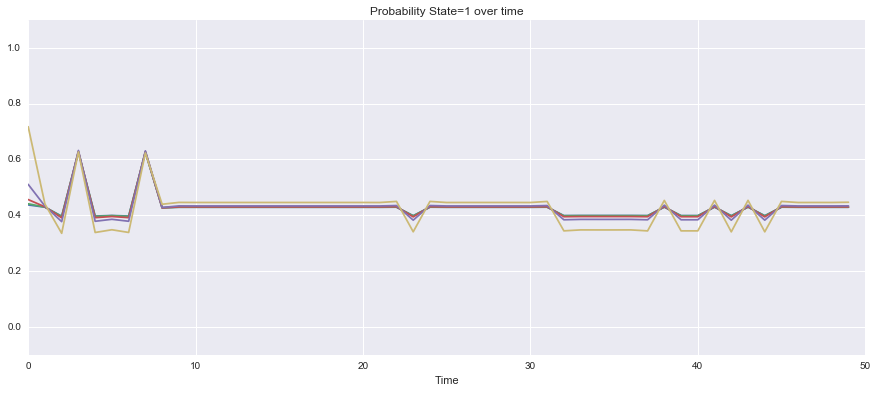

In [58]:
plt.figure(figsize=(15,6))
plt.plot(model.state_summary[::2].T)
plt.ylim(-0.1,1.1)
plt.title('Probability State=1 over time')
plt.xlabel('Time')
plt.draw()

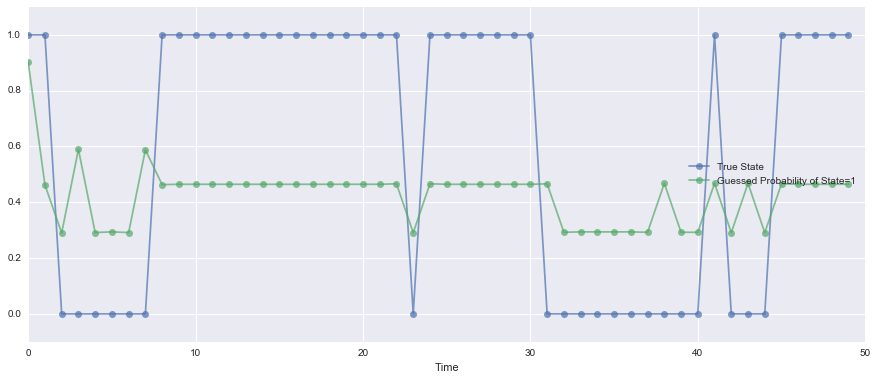

In [59]:
plt.figure(figsize=(15,6))
plt.plot(states.T,'-o',alpha=0.7)
plt.plot(model.state_summary[-1].T, '-o',alpha=0.7)
plt.legend(('True State','Guessed Probability of State=1'), loc = 'right')
plt.ylim(-0.1,1.1)
plt.xlabel('Time')
plt.draw()

In [60]:
pred = model.state_summary[-1] > 0.4
print("Accuracy: ", np.mean(pred == states))

Accuracy:  0.9
